<a href="https://colab.research.google.com/github/oguzsozen/Kuzushiji_Letter-Recognition/blob/main/Kuzushiji49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from keras import layers
from keras import models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
pathDataset = "/content/drive/MyDrive/Colab Notebooks/datasets/Kuzushiji_Datasets/Kuzushiji49"
folders = os.listdir(pathDataset)
folders

['k49-test-labels.npz',
 'k49-train-labels.npz',
 'k49-test-imgs.npz',
 'k49-train-imgs.npz']

In [ ]:
def getdata(filePath):
  data = np.load(filePath)
  return data[data.files[0]]

In [ ]:
test_label = getdata(pathDataset + "/" + folders[0])
train_label = getdata(pathDataset + "/" + folders[1])
test_data = getdata(pathDataset + "/" + folders[2])
train_data = getdata(pathDataset + "/" + folders[3])

In [ ]:
def countClassMember(array):
  dict = {}

  for i in range(49):
    dict[i] = 0

  for i in array:
    dict[i] = dict[i] + 1

  return dict

In [ ]:
countClassMember(train_label)

{0: 6000,
 1: 6000,
 2: 6000,
 3: 777,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 4714,
 9: 6000,
 10: 6000,
 11: 6000,
 12: 6000,
 13: 4165,
 14: 3867,
 15: 6000,
 16: 2565,
 17: 6000,
 18: 6000,
 19: 6000,
 20: 6000,
 21: 6000,
 22: 2063,
 23: 2451,
 24: 6000,
 25: 6000,
 26: 5132,
 27: 6000,
 28: 6000,
 29: 1993,
 30: 6000,
 31: 3060,
 32: 1718,
 33: 3394,
 34: 6000,
 35: 6000,
 36: 1598,
 37: 6000,
 38: 6000,
 39: 6000,
 40: 6000,
 41: 6000,
 42: 2139,
 43: 2397,
 44: 417,
 45: 392,
 46: 6000,
 47: 6000,
 48: 3523}

In [ ]:
countClassMember(test_label)

{0: 1000,
 1: 1000,
 2: 1000,
 3: 126,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 767,
 9: 1000,
 10: 1000,
 11: 1000,
 12: 1000,
 13: 678,
 14: 629,
 15: 1000,
 16: 418,
 17: 1000,
 18: 1000,
 19: 1000,
 20: 1000,
 21: 1000,
 22: 336,
 23: 399,
 24: 1000,
 25: 1000,
 26: 836,
 27: 1000,
 28: 1000,
 29: 324,
 30: 1000,
 31: 498,
 32: 280,
 33: 552,
 34: 1000,
 35: 1000,
 36: 260,
 37: 1000,
 38: 1000,
 39: 1000,
 40: 1000,
 41: 1000,
 42: 348,
 43: 390,
 44: 68,
 45: 64,
 46: 1000,
 47: 1000,
 48: 574}

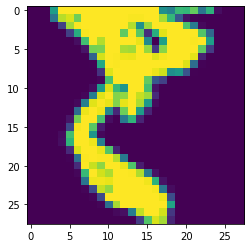

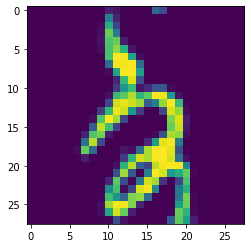

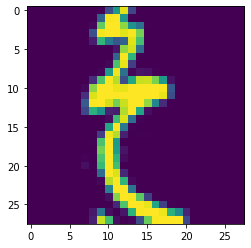

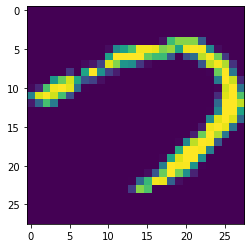

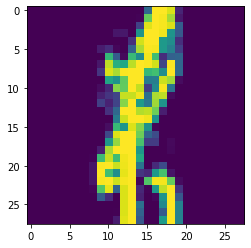

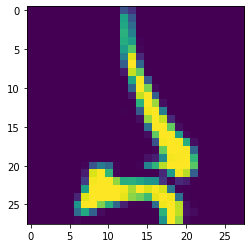

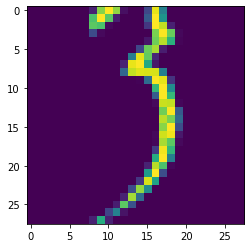

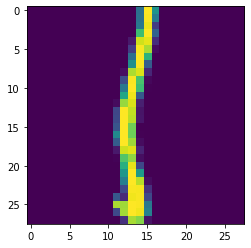

In [ ]:
plt.imshow(train_data[165], interpolation='nearest')
plt.show()
plt.imshow(train_data[23], interpolation='nearest')
plt.show()
plt.imshow(train_data[1948], interpolation='nearest')
plt.show()
plt.imshow(train_data[4063], interpolation='nearest')
plt.show()
plt.imshow(train_data[8474], interpolation='nearest')
plt.show()
plt.imshow(train_data[10784], interpolation='nearest')
plt.show()
plt.imshow(train_data[738], interpolation='nearest')
plt.show()
plt.imshow(train_data[4942], interpolation='nearest')
plt.show()

In [ ]:
print(train_data.shape)
print(test_data.shape)

(232365, 28, 28)
(38547, 28, 28)


In [ ]:
train_label

array([30, 19, 20, ..., 10, 39, 30], dtype=uint8)

In [ ]:
len(set(train_label))

49

In [ ]:
print(train_label.shape)
print(test_label.shape)

(232365,)
(38547,)


In [ ]:
train_data = train_data.reshape((232365, 28, 28, 1))
train_data = train_data.astype('float32') /255

In [ ]:
test_data = test_data.reshape((38547, 28, 28, 1))
test_data = test_data.astype('float32') /255

In [ ]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

In [ ]:
def myModel1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPool2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

  model.add(layers.Flatten())

  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(49, activation='softmax'))
  return model

In [ ]:
model=myModel1()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model.fit(train_data,
          train_label,
          epochs=10,
          batch_size=64)

Epoch 1/10
3631/3631 [==============================] - 285s 78ms/step - loss: 0.4836 - accuracy: 0.8710
Epoch 2/10
3631/3631 [==============================] - 277s 76ms/step - loss: 0.2282 - accuracy: 0.9382
Epoch 3/10
3631/3631 [==============================] - 275s 76ms/step - loss: 0.1875 - accuracy: 0.9494
Epoch 4/10
3631/3631 [==============================] - 277s 76ms/step - loss: 0.1672 - accuracy: 0.9552
Epoch 5/10
3631/3631 [==============================] - 280s 77ms/step - loss: 0.1579 - accuracy: 0.9577
Epoch 6/10
3631/3631 [==============================] - 277s 76ms/step - loss: 0.1503 - accuracy: 0.9599
Epoch 7/10
3631/3631 [==============================] - 295s 81ms/step - loss: 0.1468 - accuracy: 0.9611
Epoch 8/10
3631/3631 [==============================] - 315s 87ms/step - loss: 0.1447 - accuracy: 0.9619
Epoch 9/10
3098/3631 [========================>.....] - ETA: 43s - loss: 0.1372 - accuracy: 0.9633

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_label)

1205/1205 [==============================] - 15s 12ms/step - loss: 0.4208 - accuracy: 0.9077


In [ ]:
test_predict = model.predict(test_data)

In [ ]:
test_predict = np.argmax(test_predict, axis = 1)
test_predict

array([19, 23, 10, ...,  1, 27, 47])

In [ ]:
test_label = np.argmax(test_label, axis = 1)
test_label

array([19, 23, 10, ...,  1, 27, 47])

In [ ]:
label_names = ['あ','い','う','え','お','か','き','く','け','こ','さ','し','す','せ','そ','た','ち','つ','て','と','な','に','ぬ','ね','の','は','ひ','ふ','へ','ほ','ま','み','む','め','も','や','ゆ','よ','ら','り','る','れ','ろ','わ','ゐ','ゑ','を','ん','ゝ']

In [ ]:
len(label_names)

49

In [ ]:
print(classification_report(test_label, test_predict, target_names=label_names))

              precision    recall  f1-score   support

           あ       0.97      0.90      0.93      1000
           い       0.95      0.96      0.95      1000
           う       0.96      0.92      0.94      1000
           え       0.69      0.94      0.79       126
           お       0.94      0.93      0.93      1000
           か       0.88      0.88      0.88      1000
           き       0.87      0.92      0.89      1000
           く       0.92      0.88      0.90      1000
           け       0.85      0.88      0.87       767
           こ       0.92      0.91      0.91      1000
           さ       0.93      0.93      0.93      1000
           し       0.93      0.91      0.92      1000
           す       0.94      0.86      0.90      1000
           せ       0.88      0.80      0.84       678
           そ       0.91      0.85      0.88       629
           た       0.97      0.90      0.93      1000
           ち       0.95      0.96      0.96       418
           つ       0.95    